<a href="https://colab.research.google.com/github/SharonCamacho/PythonBucaramanga-Meetup/blob/main/Pongamos_a_hablar_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

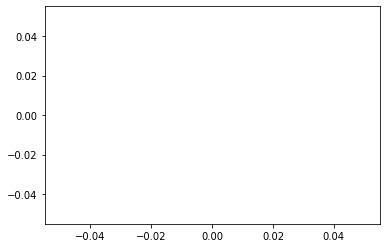

In [7]:
plt.plot()
plt.show()

### Series de Tiempo

Trabajaremos con un dataframe dummy de la tasa de desempleo mensual.
Contiene dos variables:
DATE = El primer día de cada mes
VALUE = Tasa de desempleo en % para cada mes

In [55]:
unrate = pd.read_csv("unrated.csv")

unrate['DATE'] = pd.to_datetime(unrate['DATE'])

unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


Los gráficos de línea nos permiten ver la tendencia de la tasa de desempleo en el tiempo

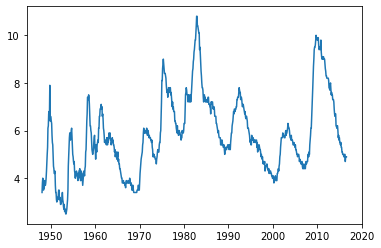

In [56]:
plt.plot(unrate['DATE'], unrate['VALUE'])

plt.show()

También lo podemos ver para una parte de los datos

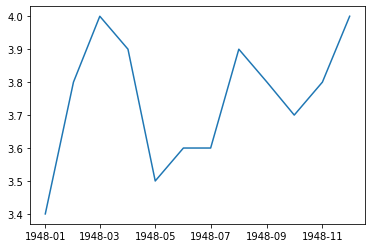

In [57]:
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))

plt.show()

Manejo de ejes

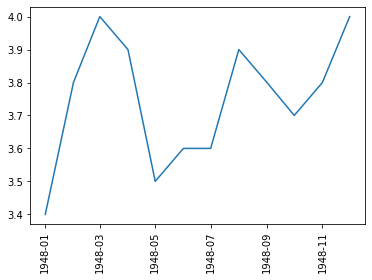

In [58]:
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))

plt.xticks(rotation=90)

plt.show()

¿Qué más le puedo poner?

**Títulos**

¿Porqué son útiles?

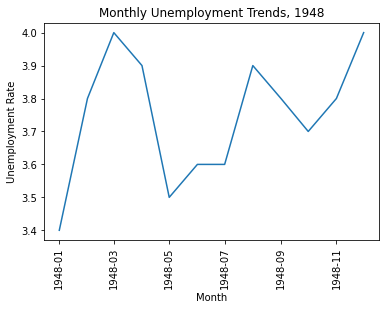

In [59]:
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))

plt.xticks(rotation=90)

plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

plt.show()

¿Qué hicimos?

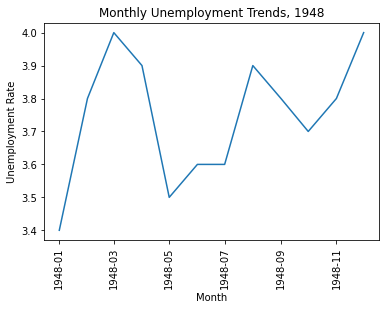

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

unrate = pd.read_csv('unrated.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

plt.plot(unrate['DATE'].head(12),unrate['VALUE'].head(12))
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

## Múltiples Gráficas

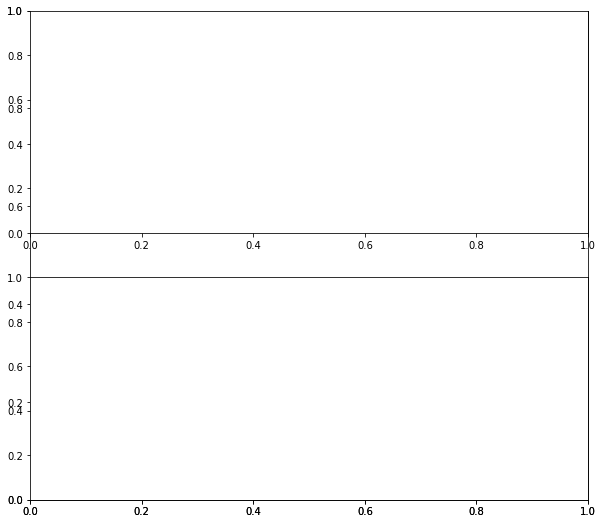

In [61]:
fig = plt.figure(figsize=(10, 9))
fig.add_subplot()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

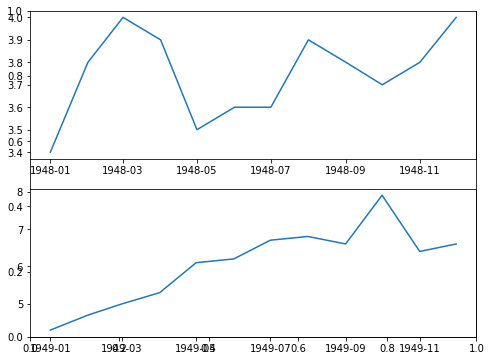

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
fig.add_subplot()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

x_values1 = unrate['DATE'].head(12)
y_values1 = unrate['VALUE'].head(12)
ax1.plot(x_values1, y_values1)

x_values2 = unrate[12:24]['DATE']
y_values2 = unrate[12:24]['VALUE']
ax2.plot(x_values2, y_values2)

plt.show()

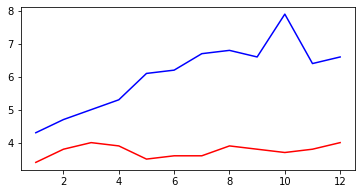

In [63]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.show()

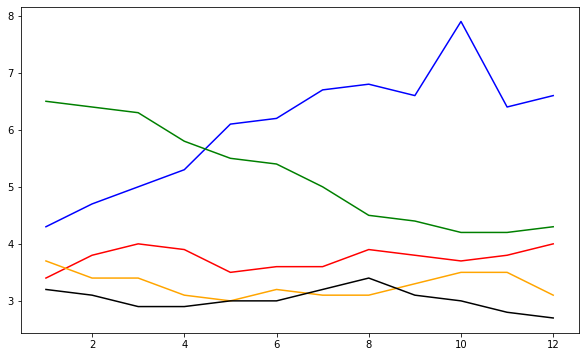

In [64]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(10,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c='green')
plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c='orange')
plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c='black')
plt.show()

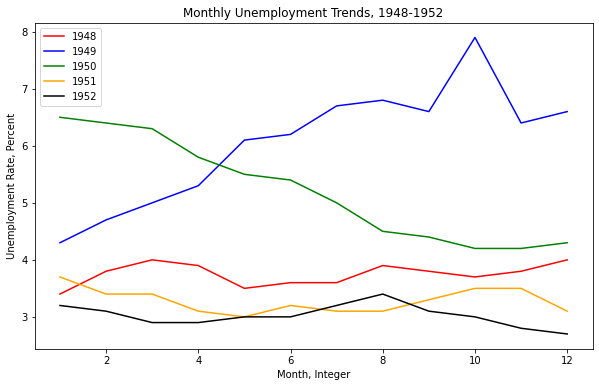

In [66]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.show()

Otra forma

In [67]:
unrate.set_index('DATE',inplace=True)


In [68]:
unrate


,VALUE,MONTH
DATE,,
1948-01-01,3.4,1
1948-02-01,3.8,2
1948-03-01,4.0,3
1948-04-01,3.9,4
1948-05-01,3.5,5
...,...,...
2016-04-01,5.0,4
2016-05-01,4.7,5
2016-06-01,4.9,6


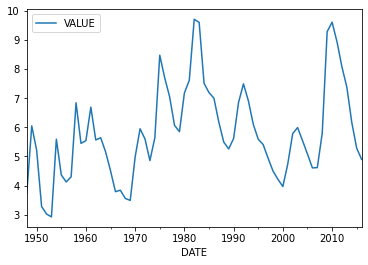

In [69]:
unrate.groupby(pd.Grouper(freq='y')).agg({'VALUE':'mean'}).plot()

## Bar Plots And Scatter Plots

In [19]:
import matplotlib.pyplot as plt
from numpy import arange
import pandas as pd

In [70]:
reviews = pd.read_csv("fandango_scores.csv")
reviews.columns
norm_reviews = reviews.loc[:,['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


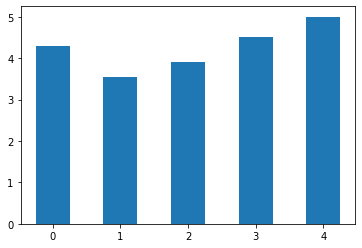

In [76]:
#Columnas a usar
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']


bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)


plt.bar(bar_positions, bar_heights, 0.5)
plt.show()

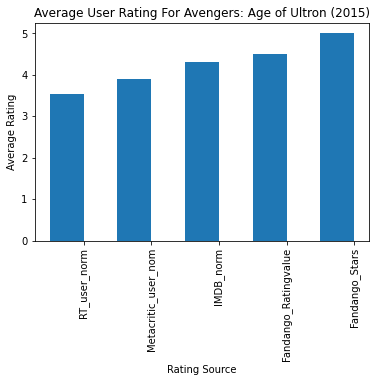

In [79]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = np.sort(norm_reviews[num_cols].iloc[0].values)
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

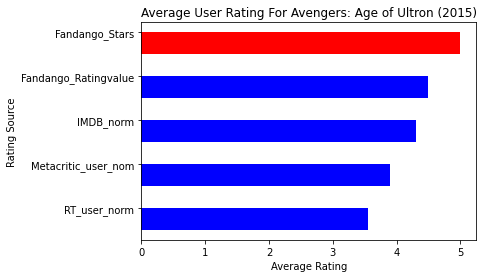

In [23]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

#bar_widths = norm_reviews[num_cols].iloc[0].values
bar_widths = np.sort(norm_reviews[num_cols].iloc[0].values)
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)



#c = ['blue','red','blue','blue','blue']
#c = ['red' if (i > 4) else 'blue' for i in bar_widths]
c = ['red' if (i == max(bar_widths)) else 'blue' for i in bar_widths]

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5, color=c)


ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Scatter Plot

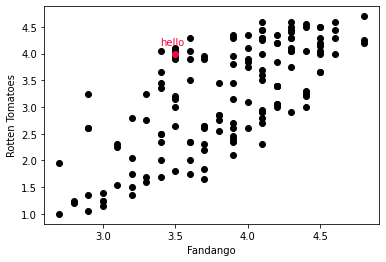

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'],facecolors='black')
plt.scatter(3.5, 4, color="#F9053E")
ax.annotate("hello", xy=(3.5, 4), color='#F9053E', 
            xytext=(-15,8), textcoords="offset points")
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')

plt.show()

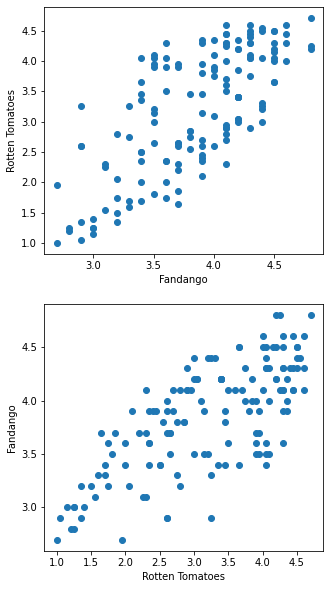

In [ ]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

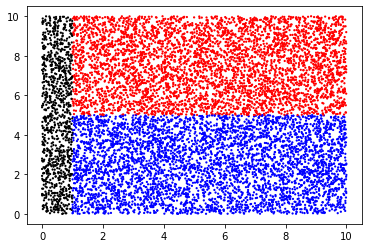

In [81]:
import numpy as np
import matplotlib.pyplot as plt

#ramdom data
x = np.random.random(10000)*10
y = np.random.random(10000)*10

col = np.where(x<1,'k',np.where(y<5,'b','r'))

plt.scatter(x, y, c=col, s=5, linewidth=0)
plt.savefig('ScatterPlot_08.png')
plt.show()